**Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Importing the dataset**

In [ ]:
dataset=pd.read_csv('titanic_dataset.csv')

**Decoding Dataset**

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Checking for missing values**

<Axes: >

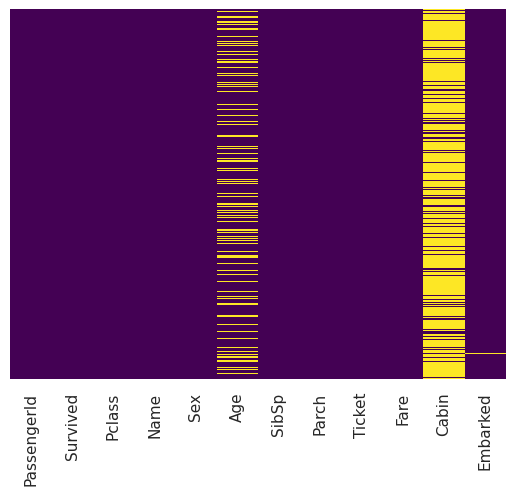

In [ ]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handling missing values**

In [ ]:
dataset['Cabin'].fillna('Unknown', inplace=True)

Insights : We cannot replace missing values as it can't be predicted and can't be assumed and also we can't remove the rows with missing columns as more than 80% are missing, so we are proceeding in this way of giving value names 'unknown'

In [ ]:
# Find the most frequently occurring value
most_frequent_value = dataset['Embarked'].mode()[0]

# Replace missing values with the most frequent value
dataset['Embarked'].fillna(most_frequent_value, inplace=True)


Insights : We have only 2 missing values in Embarked column and we replaced the missing values with most frequently entered value, that is, the value of place where most of the people embarked

Plotting the age distribution to decide whether to replace by mean of ages or median of ages

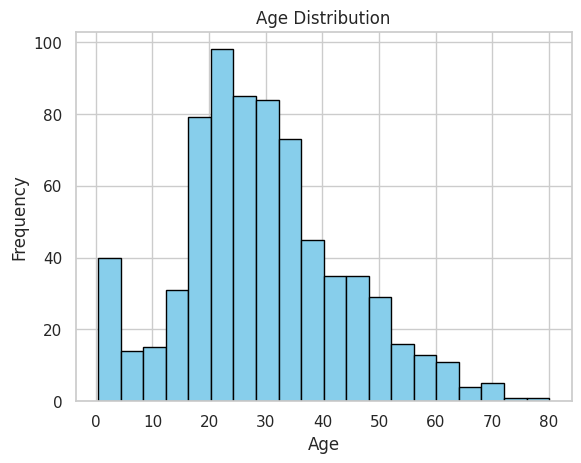

In [ ]:
plt.hist(dataset['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Insights : the distribution is almost bell-shaped curve so replacing with mean values would be good

In [ ]:
mean_age = dataset['Age'].mean()
dataset['Age'].fillna(mean_age, inplace=True)

Checking for missing values again !!

In [ ]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Explore about Categorical Variables**

Sex

In [ ]:
Gender_survival=dataset.groupby(['Survived','Sex']).size().reset_index().rename(columns={0:'Survived_Count'})

In [ ]:
print(Gender_survival)

   Survived     Sex  Survived_Count
0         0  female              81
1         0    male             468
2         1  female             233
3         1    male             109


Text(0.5, 1.0, 'Survival Counts by Sex')

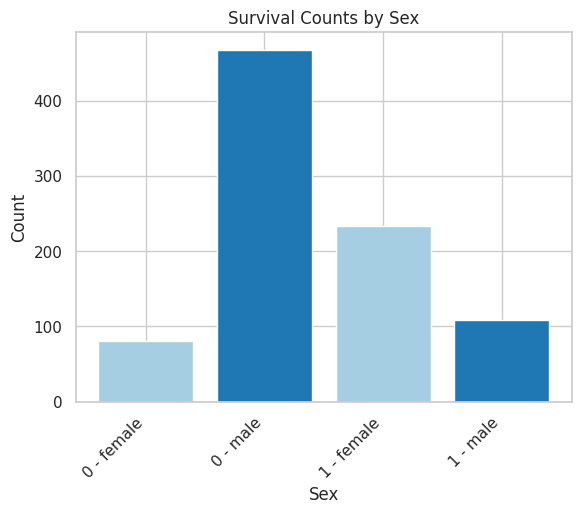

In [ ]:
xticks_labels = ['{} - {}'.format(survived, sex) for survived, sex in zip(Gender_survival['Survived'], Gender_survival['Sex'])]
plt.bar(range(len(Gender_survival)),height=Gender_survival['Survived_Count'],color = sns.color_palette("Paired", n_colors=2))
plt.xticks(range(len(Gender_survival)), xticks_labels, rotation=45, ha='right')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Counts by Sex')

Insights :

1) Female survivors are more than male survivors

2) Male strength aboarded was more than female

3) Male Count not survived is more than female

Age

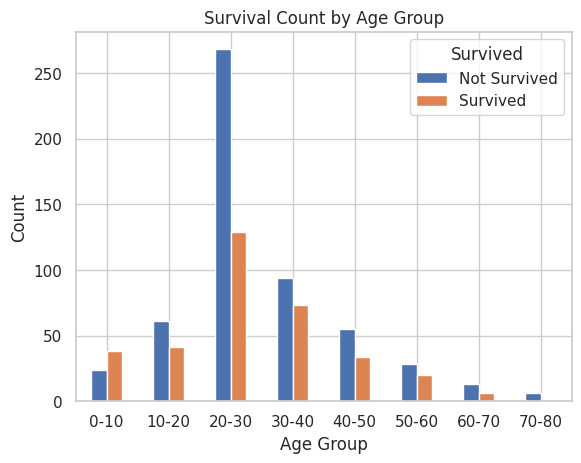

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]  # Adjust the bin edges as needed
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60','60-70','70-80']
dataset['age_group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)
age_counts=dataset.groupby(['age_group','Survived']).size().unstack(fill_value=0)
age_counts.plot(kind='bar',stacked=False,rot=0)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Count by Age Group')

# Add legend
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

# Show the plot
plt.show()

Insights :

1) Age group 20-30 has the highest survivors and non-survivors count

2) Whole age group of 70-80 did not survive

3) Survivors of Children of age group 0-10 is the only age group that has survivors more than non-survivors

4) Age group 50-60 has the least difference between survivors ans non-survivors

Pclass

What are the different passenger classes available ?

In [ ]:
dataset['Pclass'].unique()

array([3, 1, 2])

Insights : There are three different passenger classes and they are 1 , 2 and 3

In [ ]:
pclass_survivors=dataset.groupby(['Pclass','Survived']).size().unstack(fill_value=0)

In [ ]:
print(pclass_survivors)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


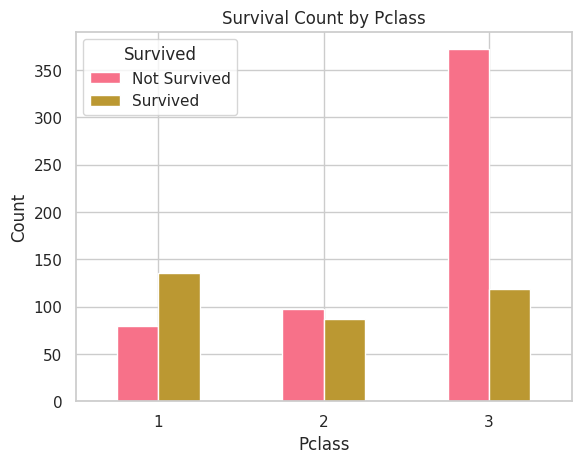

In [ ]:
sns.set(style="whitegrid")
pclass_survivors.plot(kind='bar',stacked=False,rot=0,color = sns.color_palette("husl"))
plt.ylabel('Count')
plt.title('Survival Count by Pclass')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

Insights :

1) Most of the passengers not survived are from Pclass 3

2) Pclass 2 has the least difference between survivors and non-survivors

3) Pclass 1 is the only class to have survivors count higher than non-survivors count

Cabin

What are the Different Cabins available ?

In [ ]:
len(dataset['Cabin'].unique())

148

Insights : Since there are 148 differenct cabins are present including 'unknown' we will plot the survivors against present or not in cabin, this can be done by creating a new column in dataset

In [ ]:
dataset['categorical_cabin'] = np.where(dataset['Cabin'] == 'Unknown', 'No', 'Yes')

In [ ]:
print(dataset['categorical_cabin'])

0       No
1      Yes
2       No
3      Yes
4       No
      ... 
886     No
887    Yes
888     No
889    Yes
890     No
Name: categorical_cabin, Length: 891, dtype: object


Plotting against survival

In [ ]:
Cabin_survival=dataset.groupby(['categorical_cabin','Survived']).size().unstack(fill_value=0)

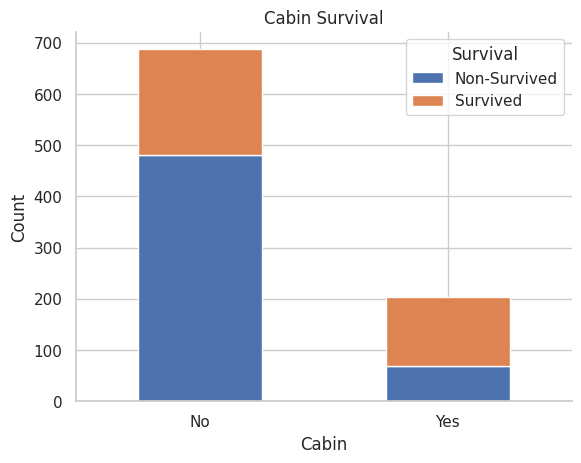

In [ ]:
Cabin_survival.plot(kind='bar',rot=0,stacked=True)
plt.ylabel('Count')
plt.xlabel('Cabin')
plt.title('Cabin Survival')
plt.legend(title='Survival',labels=['Non-Survived','Survived'])
sns.despine()
plt.show()

Insights : Survival count is more than the non-survival count for those choosed cabin